In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DEVASISH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DEVASISH\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
users = pd.read_csv("../data/Users.csv", sep=",", encoding="latin-1", on_bad_lines="skip")
books = pd.read_csv("../data/Books.csv", sep=",", encoding="latin-1", on_bad_lines="skip", low_memory=False)
ratings = pd.read_csv("../data/Ratings.csv", sep=",", encoding="latin-1", on_bad_lines="skip")

In [3]:
print(users.head())

                      User-ID,Location,Age
0                  1,"nyc, new york, usa",
1       2,"stockton, california, usa",18.0
2     3,"moscow, yukon territory, russia",
3       4,"porto, v.n.gaia, portugal",17.0
4  5,"farnborough, hants, united kingdom",


In [4]:
print(books.head())

  ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0  0195153448,Classical Mythology,Mark P. O. Morf...                                           
1  0002005018,Clara Callan,Richard Bruce Wright,2...                                           
2  0060973129,Decision in Normandy,Carlo D'Este,1...                                           
3  0374157065,Flu: The Story of the Great Influen...                                           
4  0399135782,The Kitchen God's Wife,Amy Tan,1991...                                           


In [5]:
print(ratings.head())

  User-ID,ISBN,Book-Rating
0      276725,034545104X,0
1      276726,0155061224,5
2      276727,0446520802,0
3      276729,052165615X,3
4      276729,0521795028,6


In [5]:
ratings = ratings.rename(columns={
    "User-ID": "User_ID",
    "Book-Rating": "Book_Rating"
})

print(ratings.columns)

Index(['User_ID', 'ISBN', 'Book_Rating'], dtype='object')


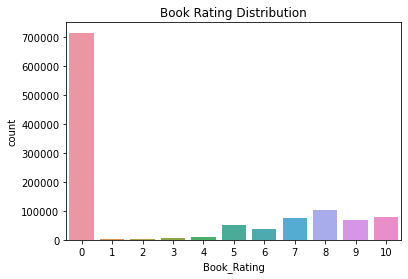

In [27]:
sns.countplot(x="Book_Rating", data=ratings)
plt.title("Book Rating Distribution")
plt.show()

In [28]:
top_books = ratings["ISBN"].value_counts().head(10)
print("Top rated books ISBNs:", top_books.index.tolist())

Top rated books ISBNs: ['0971880107', '0316666343', '0385504209', '0060928336', '0312195516', '044023722X', '0679781587', '0142001740', '067976402X', '0671027360']


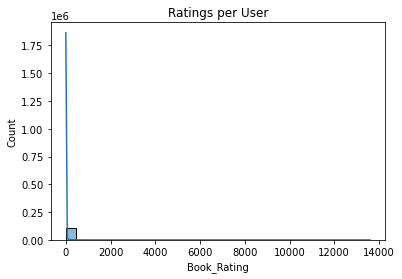

In [31]:
# Number of ratings per user
ratings_per_user = ratings.groupby("User_ID")["Book_Rating"].count()
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title("Ratings per User")
plt.show()

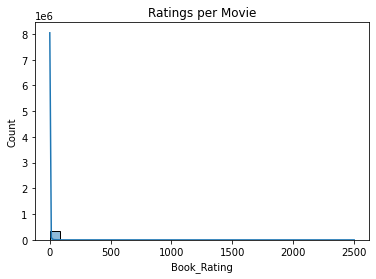

In [36]:
ratings_per_movie = ratings.groupby("ISBN")["Book_Rating"].count()
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title("Ratings per Movie")
plt.show()

In [6]:
# Save cleaned dataset
ratings = ratings.dropna()
ratings.to_csv("../data/ratings_clean.csv", index=False)

In [7]:
import pandas as pd

users = pd.read_csv("../data/Users.csv", sep=";", encoding="latin-1", on_bad_lines="skip")
ratings = pd.read_csv("../data/Ratings.csv", sep=",", encoding="latin-1", on_bad_lines="skip")
print(ratings.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [8]:
# Get active users (those with >20 ratings, for example)
active_users = ratings['User-ID'].value_counts()
print(active_users.head(10))

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


In [9]:
print(ratings['User-ID'].nunique(), "unique users")
print(ratings['User-ID'].head())

105283 unique users
0    276725
1    276726
2    276727
3    276729
4    276729
Name: User-ID, dtype: int64
